# Using ``controlSBML``

## Preliminaries

In [1]:
import controlSBML.control_sbml as ctl

import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ControlSBML Objects

In [2]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
                       input_names=["v1", "v4"], output_names=["mTORC1", "mTORC2"])

In [3]:
# Print the first few lines of the antimony representation of this model
print(ctlsb.antimony)

// Created by libAntimony v2.12.0
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end

HMM_Mod is "HMM_Mod"

function Function_for_v11(k11ca, pmTORC1, DEPTOR, Km11a, pDEPTOR, k11cb, pmTORC2, Km11b)
  k11ca*pmTORC1*DEPTOR/(Km11a + pDEPTOR) + k11cb*pmTORC2*DEPTOR/(Km11b + DEPTOR);
end

Function_for_v11 is "Function_for_v11"

function Function_for_v5(k5ca, pIRS, Akt, Km5a, k5cb, pmTORC2, Km5b)
  k5ca*pIRS*Akt/(Km5a + Akt) + k5cb*pmTORC2*Akt/(Km5b + Akt);
end

Function_for_v5 is "Function_for_v5"


model *Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR()

  // Compartments and Species:
  compartment compartment_;
  species IR in c

In [4]:
ctlsb.state_names

['IR',
 'pIR',
 'IRS',
 'pIRS',
 'iIRS',
 'Akt',
 'pAkt',
 'mTORC1',
 'pmTORC1',
 'mTORC2',
 'pmTORC2',
 'imTORC2',
 'mTORC1_DEPTOR',
 'mTORC2_DEPTOR',
 'DEPTOR',
 'pDEPTOR']

In [5]:
ctlsb.jacobian_df

,IR,pIR,IRS,pIRS,iIRS,Akt,pAkt,mTORC1,pmTORC1,mTORC2,pmTORC2,imTORC2,mTORC1_DEPTOR,mTORC2_DEPTOR,DEPTOR,pDEPTOR
IR,-0.004518,0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIR,0.004518,-0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
IRS,0.000000,-0.066667,0.0,0.020000,0.02,0.0,0.000000,0.00,-0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIRS,0.000000,0.066667,0.0,-0.020000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
iIRS,0.000000,0.000000,0.0,0.000000,-0.02,0.0,0.000000,0.00,0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
Akt,0.000000,0.000000,0.0,-0.046729,0.00,0.0,0.058824,0.00,0.000000,0.00,-1.442308,0.0,0.000,0.000,0.00,0.000000
pAkt,0.000000,0.000000,0.0,0.046729,0.00,0.0,-0.058824,0.00,0.000000,0.00,1.442308,0.0,0.000,0.000,0.00,0.000000
mTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,-0.099206,-0.35,5.999848,0.00,0.000000,0.0,0.006,0.000,-0.25,0.000000
pmTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.099206,0.00,-5.999848,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
mTORC2,0.000000,-0.166667,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,-2.45,0.428571,0.0,0.000,0.006,-1.40,0.000000


In [6]:
np.linalg.matrix_rank(ctlsb.A_df.values)

9

# State Space for SBML Model

A state space representation has the form:
* $\dot{{\bf x}} = {\bf A} {\bf x} + {\bf B} {\bf u}$
* ${\bf y} = {\bf C} {\bf x}$

Below is described the elements of this representation for SBML models.

In [7]:
# Create a state space representation of the model using the Jacobian at time 1. The A matrix of the sys object is the Jacobian.
ctlsb.setTime(1)
sys = ctlsb.makeStateSpace()

In [8]:
ctlsb.input_names

['v1', 'v4']

In [9]:
ctlsb.B_df

,v1,v4
IR,-1.0,0.0
pIR,1.0,0.0
IRS,0.0,1.0
pIRS,0.0,-1.0
iIRS,0.0,0.0
Akt,0.0,0.0
pAkt,0.0,0.0
mTORC1,0.0,0.0
pmTORC1,0.0,0.0
mTORC2,0.0,0.0


In [10]:
ctlsb.output_names

['mTORC1', 'mTORC2']

In [11]:
ctlsb.C_df

,IR,pIR,IRS,pIRS,iIRS,Akt,pAkt,mTORC1,pmTORC1,mTORC2,pmTORC2,imTORC2,mTORC1_DEPTOR,mTORC2_DEPTOR,DEPTOR,pDEPTOR
mTORC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mTORC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Simulations and Accuracy of Linearization

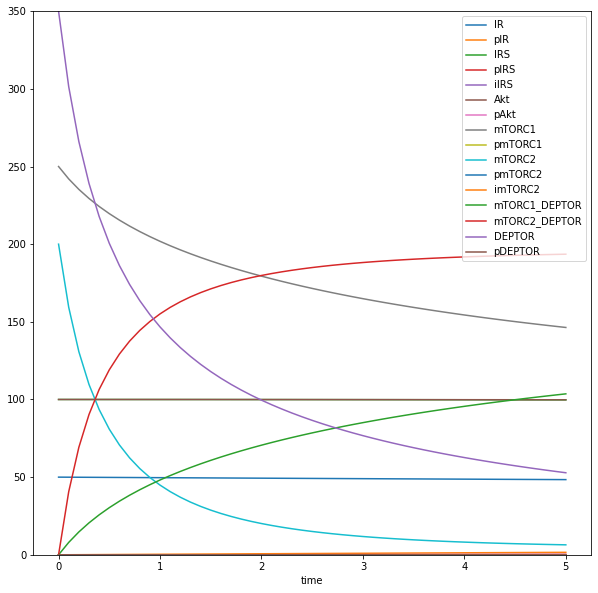

In [12]:
# Plot roadrunner simulation, with better placement of the legend.
ctlsb.plotTrueModel()

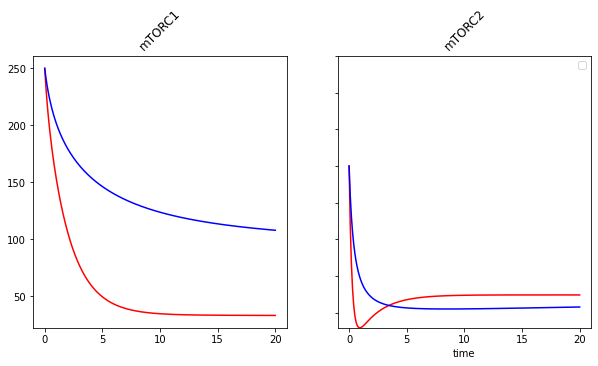

In [15]:
# Compare the linear approximation using the Jacobian at time 0 with the true model
ctlsb.setTime(1)
ctlsb.plotLinearApproximation(step_val=0, figsize=(10, 5), xlabel="time", end_time=20)

# Frequency Analysis

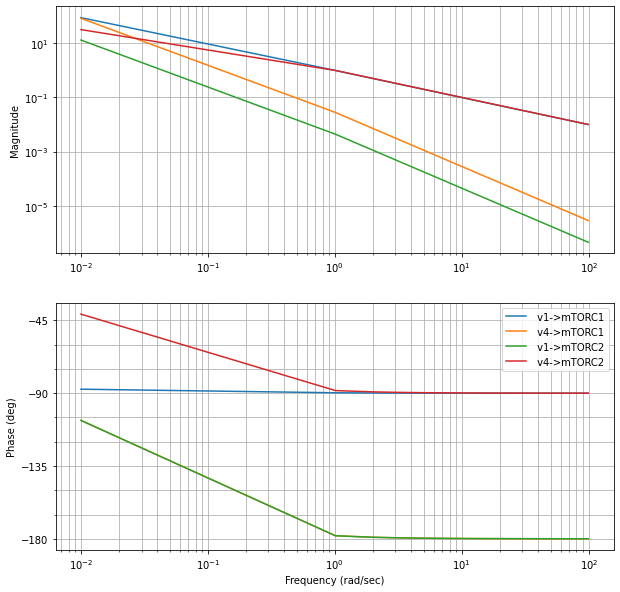

In [14]:
ctlsb.plotBode()